# TUTORIAL NMMA- Light curve simulation

In [48]:
#general modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys, time, glob
from astropy.time import Time
import copy
import scipy
#nmma modules
sys.path.append('/Users/fabioragosta/nmma') #path to nmma
import nmma
import nmma.em.utils as utils
from nmma.em.model import SimpleKilonovaLightCurveModel, SVDLightCurveModel, KilonovaGRBLightCurveModel, GenericCombineLightCurveModel
from nmma.em import training, utils, model_parameters

The package nmma.em.model contains a number of models can be used to perform a simulation, some of them use parametric models derived from data: SVDLightCurveModel; others use parametrized models from the letterature: SimpleKilonovaLightCurveModel, GRBLightCurveModel, KilonovaGRBLightCurveModel, GenericCombineLightCurveModel. 

In the following for each of the model the parameters the function has to be injected with to run the simulation.

In [2]:
nmma.em.model.model_parameters_dict

{'Bu2019nsbh': ['log10_mej_dyn', 'log10_mej_wind', 'KNtheta'],
 'Bu2019lm': ['log10_mej_dyn', 'log10_mej_wind', 'KNphi', 'KNtheta'],
 'Ka2017': ['log10_mej', 'log10_vej', 'log10_Xlan'],
 'Bu2019lm_sparse': ['log10_mej_dyn', 'log10_mej_wind'],
 'TrPi2018': ['inclination_EM',
  'log10_E0',
  'thetaCore',
  'thetaWing',
  'b',
  'L0',
  'q',
  'ts',
  'log10_n0',
  'p',
  'log10_epsilon_e',
  'log10_epsilon_B',
  'xi_N',
  'd_L'],
 'Piro2021': ['log10_Menv', 'log10_Renv', 'log10_Ee'],
 'Me2017': ['log10_Mej', 'log10_vej', 'beta', 'log10_kappa_r'],
 'Bu2022mv': ['log10_mej_dyn',
  'vej_dyn',
  'log10_mej_wind',
  'vej_wind',
  'KNtheta'],
 'PL_BB_fixedT': ['bb_luminosity', 'temperature', 'beta', 'powerlaw_mag']}

**All the lightcurves will be simulated in the following filters:**

In [3]:
utils.filts

['u',
 'g',
 'r',
 'i',
 'z',
 'y',
 'J',
 'H',
 'K',
 'radio-3GHz',
 'radio-1.25GHz',
 'radio-5.5GHz',
 'radio-6GHz',
 'X-ray-1keV',
 'X-ray-5keV']

To use the model what is needed is a two step process:

1- create the object with the model 

2- inject the parameters

The result is the absolute magnitude lightcurve in all the filters.

**Note: sample_times is an array which represent the time from the explosion, do not use MJD!**

In [4]:
# create the object
tmin, tmax, dt = 0.5, 20.0, 0.5
sample_times = np.arange(tmin, tmax + dt, dt)

kn_model = SimpleKilonovaLightCurveModel(sample_times=sample_times)

# run the simulation
bestfit_params = {
    "luminosity_distance": 46.4894661695928,
    "beta": 3.6941470839046575,
    "log10_kappa_r": 1.6646575950692677,
    "KNtimeshift": 0.183516607107672,
    "log10_vej": -0.431500234170688,
    "log10_Mej": -1.4122890,
}
_, mag = kn_model.generate_lightcurve(sample_times, bestfit_params)

/Users/fabioragosta/nmma/nmma/em/utils.py:926: RuntimeWarning: invalid value encountered in double_scalars
  temp[j] = 1e10 * (3 * E[j] / (arad * 4 * np.pi * R[j] ** (3))) ** (0.25)
/Users/fabioragosta/nmma/nmma/em/utils.py:985: RuntimeWarning: invalid value encountered in true_divide
  Tobs = 1e10 * (Ltot / (4 * np.pi * Rphoto ** 2 * sigSB)) ** (0.25)


In [5]:
mag

{'u': array([-3.4346002 , -1.95169666,  1.61143482,  4.26672289,  6.60612464,
         8.81296659, 10.99874066, 13.24668244, 15.37688373, 17.40341054,
        19.61606392, 21.77293576, 23.87885013, 25.93750021, 27.95169648,
        29.92354767, 32.22429219, 34.12910946, 36.39389351, 38.64874904,
        40.46212174, 42.6799153 , 44.88614736, 47.07998847, 49.26053629,
        51.42684037, 53.57792349, 55.71279977, 57.83048992, 59.9300339 ,
        62.0105013 , 64.66884397, 66.72283351, 68.75504408, 71.40961987,
        74.07352129, 76.74589874, 79.42594143, 82.11287849,         inf]),
 'g': array([-7.28736748, -6.60553331, -4.15895067, -2.32703705, -0.69674644,
         0.85229262,  2.39431702,  3.98585135,  5.50037848,  6.94625728,
         8.52621969, 10.07018635, 11.58091369, 13.06050285, 14.51053371,
        15.93216499, 17.58879965, 18.96566465, 20.59979697, 22.22827739,
        23.54308501, 25.14721827, 26.74409363, 28.33300147, 29.91319141,
        31.48388845, 33.04430696, 34.59

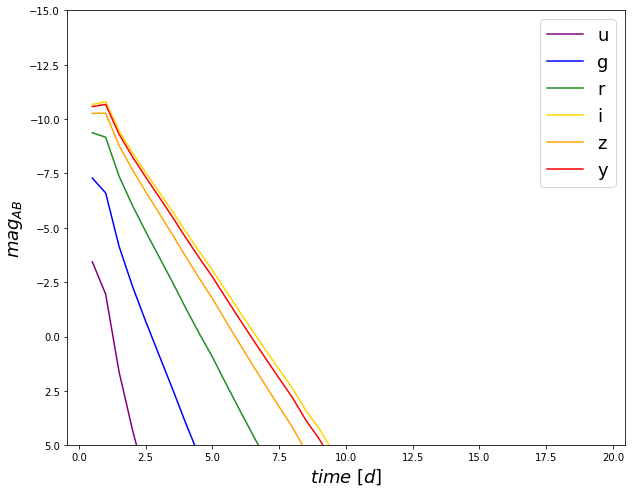

In [6]:
colors = {'u':'purple','g':'blue','r':'forestgreen','i':'gold','z':'orange','y':'red'}
fig, ax = plt.subplots(1,1,figsize=(10,8))
for f in colors.keys():
    m = np.array(mag[f])
    #merr = np.array(lcs['merr'])[mask][ind]
    ax.plot(sample_times, m,'-', label=f,color=colors[f])
    ax.set_ylabel(r'$mag_{AB}$', fontsize=18)
    ax.set_xlabel(r'$time~[d]$', fontsize=18)
    ax.ticklabel_format(useOffset=False)
    #ax.set_xscale('log')
    ax.set_ylim([5,-15])
    ax.legend(fontsize=18)

If you want to simulate data from a specific data set you might want to run a features extraction on your data and insert these as a *new model* in the list of model in nmma.em.model

The procedure to do that is described in the following:

    1- create the files with the features and  and the parameters for the gaussian process
    2- create the light curve model for the subsequent simulations

The modelname is related to a funciton to extract the parameter we need from the data. Helper function are in model_parameter module already, so to run an example I will refer to one of those (be aware that errors can rise if the fuction is not the right one to process the data):

In [49]:
model_name = "Bu2019lm_sparse"
n_coeff = 3
# The array of times we'll use to examine each lightcurve
tini, tmax, dt = 0.1, 5.0, 0.2
tt = np.arange(tini, tmax + dt, dt)  

# The filters we'll be focusing on
filts = ["g","r"] # We will focus on these two bands; all available: ["u","g","r","i","z","y","J","H","K"]

dataDir = "/Users/fabioragosta/nmma/nmma/tests/data/bulla"
ModelPath = "/Users/fabioragosta/nmma/svdmodels"
filenames = glob.glob("%s/*.dat" % dataDir)

data = utils.read_files(filenames, filters=filts)
# Loads the model data
training_data, parameters = model_parameters.Bu2019lm_sparse(data)

#two differen interpolation types are possible "sklearn_gp" or "tensorflow"
interpolation_type = "tensorflow"
training_model=training.SVDTrainingModel(
    model_name,
    copy.deepcopy(training_data),
    parameters,
    tt,
    filts,
    svd_path=ModelPath,
    n_coeff=n_coeff,
    interpolation_type=interpolation_type,
    n_epochs=100
)

light_curve_model = SVDLightCurveModel(
        model_name,
        sample_times,
        svd_path=ModelPath,
        interpolation_type=interpolation_type,
        model_parameters=training_model.model_parameters,
    )

Model exists... will load that model.


using the model we derived with the SVD training we could recostruct the lightcurves and retrieve the parameters 

In [51]:
modelkeys = list(training_data.keys())
for mk in modelkeys:
    training_ = training_data[mk]
    parameters = training_model.model_parameters
    data = {param: training_[param] for param in parameters}
    print(data)

{'log10_mej_dyn': -2.3010299956639813, 'log10_mej_wind': -1.0457574905606752}
{'log10_mej_dyn': -2.0, 'log10_mej_wind': -1.5228787452803376}
{'log10_mej_dyn': -2.3010299956639813, 'log10_mej_wind': -2.0}
{'log10_mej_dyn': -1.6989700043360187, 'log10_mej_wind': -1.5228787452803376}
{'log10_mej_dyn': -3.0, 'log10_mej_wind': -0.958607314841775}
{'log10_mej_dyn': -3.0, 'log10_mej_wind': -1.154901959985743}
{'log10_mej_dyn': -3.0, 'log10_mej_wind': -1.0457574905606752}
{'log10_mej_dyn': -2.0, 'log10_mej_wind': -1.3010299956639813}
{'log10_mej_dyn': -2.0, 'log10_mej_wind': -0.8860566476931632}
{'log10_mej_dyn': -3.0, 'log10_mej_wind': -2.0}
{'log10_mej_dyn': -1.6989700043360187, 'log10_mej_wind': -0.8860566476931632}
{'log10_mej_dyn': -2.3010299956639813, 'log10_mej_wind': -0.958607314841775}
{'log10_mej_dyn': -2.3010299956639813, 'log10_mej_wind': -1.154901959985743}
{'log10_mej_dyn': -1.6989700043360187, 'log10_mej_wind': -1.3010299956639813}
{'log10_mej_dyn': -2.0, 'log10_mej_wind': -1.15

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


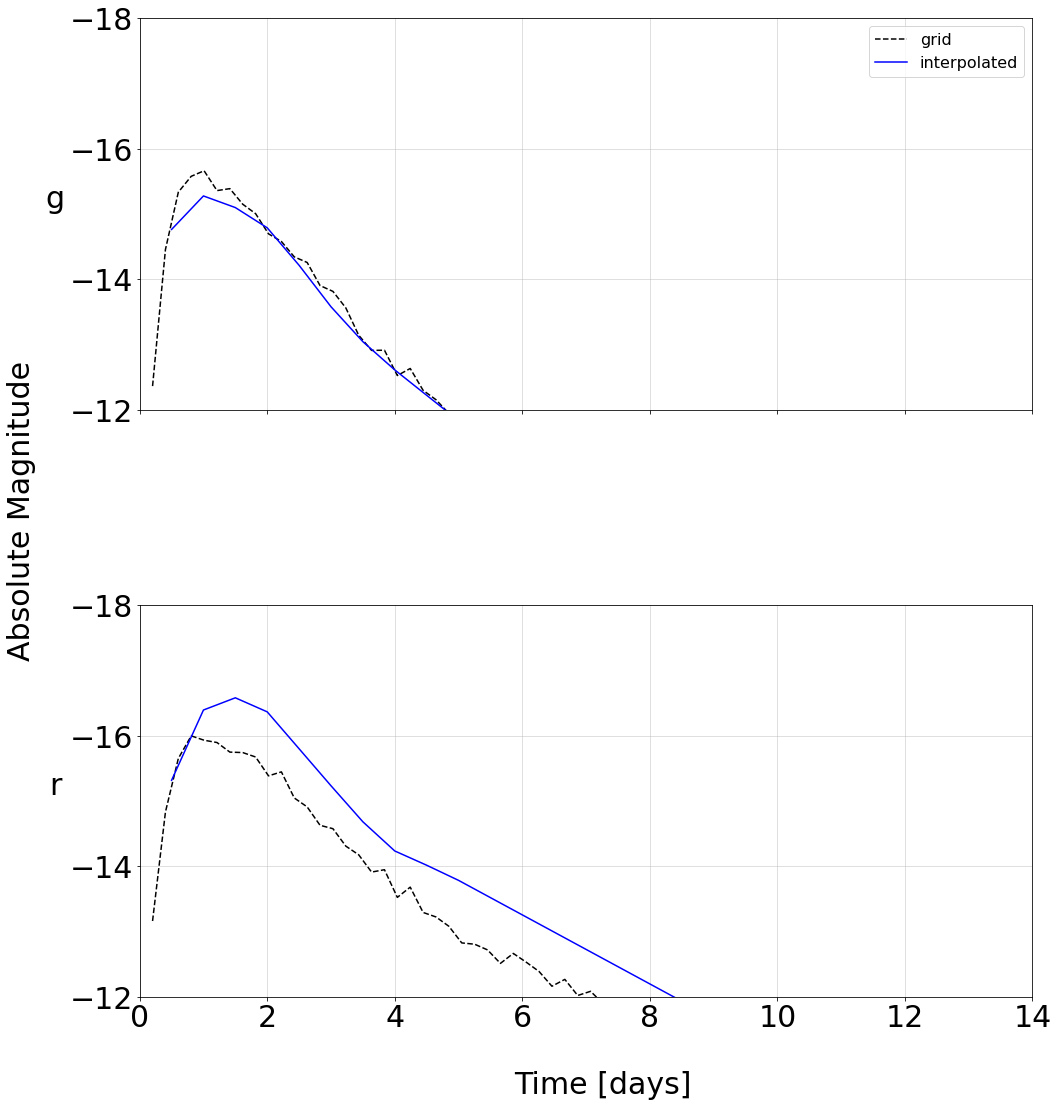

In [43]:
modelkeys = list(training_data.keys())
training = training_data[modelkeys[0]]
parameters = training_model.model_parameters
data = {param: training[param] for param in parameters}
data["redshift"] = 0
data['inclination_EM']=0
lbol, mag = light_curve_model.generate_lightcurve(sample_times, data)

import matplotlib.pyplot as plt


fig = plt.figure(figsize=(16, 18))

ncols = 1
nrows = int(np.ceil(len(filts) / ncols))
gs = fig.add_gridspec(nrows=nrows, ncols=ncols, wspace=0.6, hspace=0.5)

for ii, filt in enumerate(filts):
    loc_x, loc_y = np.divmod(ii, nrows)
    loc_x, loc_y = int(loc_x), int(loc_y)
    ax = fig.add_subplot(gs[loc_y, loc_x])

    plt.plot(training['t'], training[filt], "k--", label="grid")
    plt.plot(sample_times, mag[filt], "b-", label="interpolated")

    ax.set_xlim([0, 14])
    ax.set_ylim([-12, -18])
    ax.set_ylabel(filt, fontsize=30, rotation=0, labelpad=14)

    if ii == 0:
        ax.legend(fontsize=16)

    if ii == len(filts) - 1:
        ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14])
    else:
        plt.setp(ax.get_xticklabels(), visible=False)
    ax.set_yticks([-18, -16, -14, -12])
    ax.tick_params(axis="x", labelsize=30)
    ax.tick_params(axis="y", labelsize=30)
    ax.grid(which="both", alpha=0.5)

fig.text(0.45, 0.05, "Time [days]", fontsize=30)
fig.text(
    0.01,
    0.5,
    "Absolute Magnitude",
    va="center",
    rotation="vertical",
    fontsize=30,
)

plt.tight_layout()
plt.show()

to simulate a new lc we need to pass to the lightcurve model a different set of parameters

In [55]:
tmin, tmax, dt = 0.5, 20.0, 0.5
sample_times = np.arange(tmin, tmax + dt, dt)
param= {'log10_mej_dyn': -1.0, 'log10_mej_wind': -3.0457574905606752, 'redshift':0.4, 'inclination_EM':0}

_, mag = light_curve_model.generate_lightcurve(sample_times,parameters=param)


In [56]:
mag

{'u': array([-12.89744992, -14.03495581, -13.63562209, -12.88055057,
        -12.22819548, -11.57236602, -10.80965289, -10.12603198,
         -9.48584741,  -8.6518079 ,  -8.00207585,  -7.61648743,
         -7.02576115,  -6.58265481,  -6.41516473,  -6.24767466,
         -6.08018458,  -5.91269451,  -5.74520443,  -5.57771435,
         -5.41022428,  -5.2427342 ,  -5.07524413,  -4.90775405,
         -4.74026398,  -4.5727739 ,  -4.40528382,  -4.23779375,
         -4.07030367,  -3.9028136 ,  -3.73532352,  -3.56783345,
         -3.40034337,  -3.2328533 ,  -3.06536322,  -2.89787314,
         -2.73038307,  -2.56289299,  -2.39540292,  -2.22791284]),
 'g': array([-14.32166216, -16.19771012, -16.42804651, -16.37771309,
        -16.18217631, -15.7976206 , -15.34792588, -14.86137974,
        -14.33347016, -13.95816752, -13.81069662, -13.54874858,
        -13.39462043, -13.27442936, -13.22341352, -13.17239769,
        -13.12138185, -13.07036601, -13.01935018, -12.96833434,
        -12.91731851, -12.86

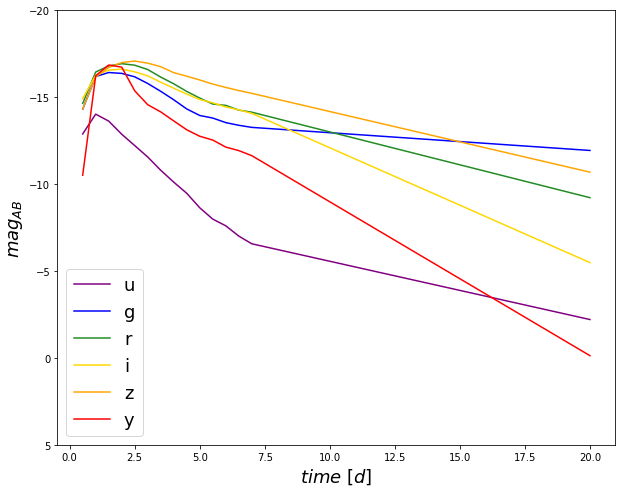

In [58]:
colors = {'u':'purple','g':'blue','r':'forestgreen','i':'gold','z':'orange','y':'red'}
fig, ax = plt.subplots(1,1,figsize=(10,8))
for f in colors.keys():
    m = np.array(mag[f])
    #merr = np.array(lcs['merr'])[mask][ind]
    ax.plot(sample_times, m,'-', label=f,color=colors[f])
    ax.set_ylabel(r'$mag_{AB}$', fontsize=18)
    ax.set_xlabel(r'$time~[d]$', fontsize=18)
    ax.ticklabel_format(useOffset=False)
    #ax.set_xscale('log')
    ax.set_ylim([5,-20])
    ax.legend(fontsize=18)

Eventually you might want to combine different lightcurve models, you can do this using GenericCombineLightCurveModel, all you need is a list of light curve models.

In the example I use the light curve models I have created in this notebook.

In [61]:
models = [light_curve_model,kn_model]
combine_lc = GenericCombineLightCurveModel(models=models, sample_times=sample_times)
param_combine={}
param_combine.update(param)
param_combine.update(bestfit_params)
_, mag =combine_lc.generate_lightcurve(sample_times, param_combine)

/Users/fabioragosta/nmma/nmma/em/utils.py:945: RuntimeWarning: invalid value encountered in power
  ) ** (0.25)
/Users/fabioragosta/nmma/nmma/em/utils.py:985: RuntimeWarning: invalid value encountered in true_divide
  Tobs = 1e10 * (Ltot / (4 * np.pi * Rphoto ** 2 * sigSB)) ** (0.25)


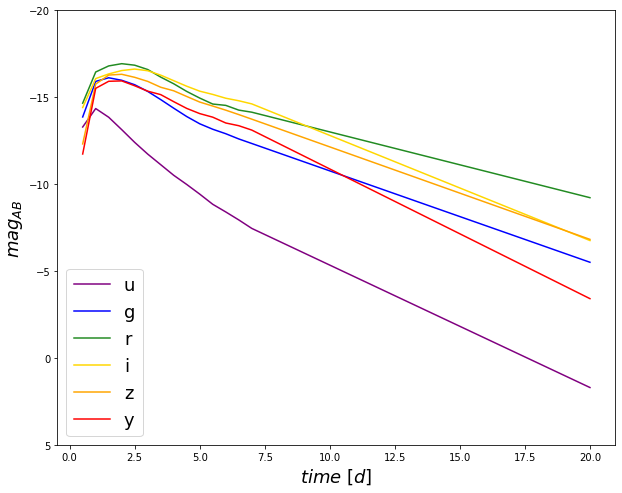

In [62]:
colors = {'u':'purple','g':'blue','r':'forestgreen','i':'gold','z':'orange','y':'red'}
fig, ax = plt.subplots(1,1,figsize=(10,8))
for f in colors.keys():
    m = np.array(mag[f])
    #merr = np.array(lcs['merr'])[mask][ind]
    ax.plot(sample_times, m,'-', label=f,color=colors[f])
    ax.set_ylabel(r'$mag_{AB}$', fontsize=18)
    ax.set_xlabel(r'$time~[d]$', fontsize=18)
    ax.ticklabel_format(useOffset=False)
    #ax.set_xscale('log')
    ax.set_ylim([5,-20])
    ax.legend(fontsize=18)